# Why do you need SHAP values to interpret non-linear ML models?

In [1]:
houses = {
    'Bedrooms': [3, 3, 3, 3, 3, 3],
    'Bathrooms': [2, 2, 2, 2, 2, 2],
    'Garage': [2, 2, 2, 2, 2, 2],
    'Build Year': [2000, 2000, 2000, 2000, 2000, 2000],
    'Floor Area': [100, 200, 201, 202, 203, 204],
}

In [2]:
import pandas as pd
df_pred = pd.concat({'X': pd.DataFrame(houses)}, axis=1)
df_pred.style

## Load data

In [3]:
path = '../../../data/house_perth/output/ml_simple.csv'
df_base = pd.read_csv(path, index_col=0)
df_base

,Price,Bedrooms,Bathrooms,Garage,Build Year,Floor Area
ADDRESS,,,,,,
1 Datchet Turn,270000,3,2,2.0,2011.0,109
1 McKenzie Corner,470000,4,2,2.0,2005.0,279
...,...,...,...,...,...,...
93 Centennial Avenue,350000,4,2,2.0,2005.0,177
98 Centennial Avenue,441000,4,2,2.0,2004.0,195


## Feature selection

In [4]:
target = 'Price'

y = df_base[target]
X = df_base.drop(columns=target)

## Linear models

### Modelling

To optimize the weights of the mathematical equation.

In [5]:
from sklearn.linear_model import LinearRegression

model_lineal = LinearRegression()
model_lineal.fit(X, y)

LinearRegression()

### Evaluation

To compare the predictions with the real values.

In [6]:
model_lineal.score(X, y)

0.5881533749382085

### Explainaibility

To understand how each feature contributes to the prediction.

In [7]:
y_pred = model_lineal.predict(df_pred['X'])
df_pred['y_pred_lineal', 'Price'] = y_pred
df_pred['y_pred_lineal', 'Price_DIF'] = df_pred['y_pred_lineal', 'Price'].diff()
df_pred.style

In [8]:
model_lineal.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Bedrooms', 'Bathrooms', 'Garage', 'Build Year', 'Floor Area'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([20407.52444216, -5446.13921643,  1952.49704666, -2468.27502394,
         1080.61667876]),
 'rank_': 5,
 'singular_': array([530.86671669,  37.87460383,   8.72349157,   5.89859143,
          1.46656318]),
 'intercept_': 5081430.233404346}

## Non-linear models

### Modelling

To optimize the weights of the mathematical equation.

In [9]:
from sklearn.tree import DecisionTreeRegressor

model_lineal_no = DecisionTreeRegressor()
model_lineal_no.fit(X, y)

DecisionTreeRegressor()

### Evaluation

To compare the predictions with the real values.

In [10]:
model_lineal_no.score(X, y)

0.9746449876358452

### Explainaibility

To understand how each feature contributes to the prediction.

In [11]:
y_pred = model_lineal_no.predict(df_pred['X'])
df_pred['y_pred_lineal_no', 'Price'] = y_pred
df_pred['y_pred_lineal_no', 'Price_DIF'] = df_pred['y_pred_lineal_no', 'Price'].diff()
df_pred.style

In [12]:
model_lineal_no.__dict__

{'criterion': 'squared_error',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Bedrooms', 'Bathrooms', 'Garage', 'Build Year', 'Floor Area'],
       dtype=object),
 'n_features_in_': 5,
 'n_outputs_': 1,
 'max_features_': 5,
 'tree_': <sklearn.tree._tree.Tree at 0x168715370>}

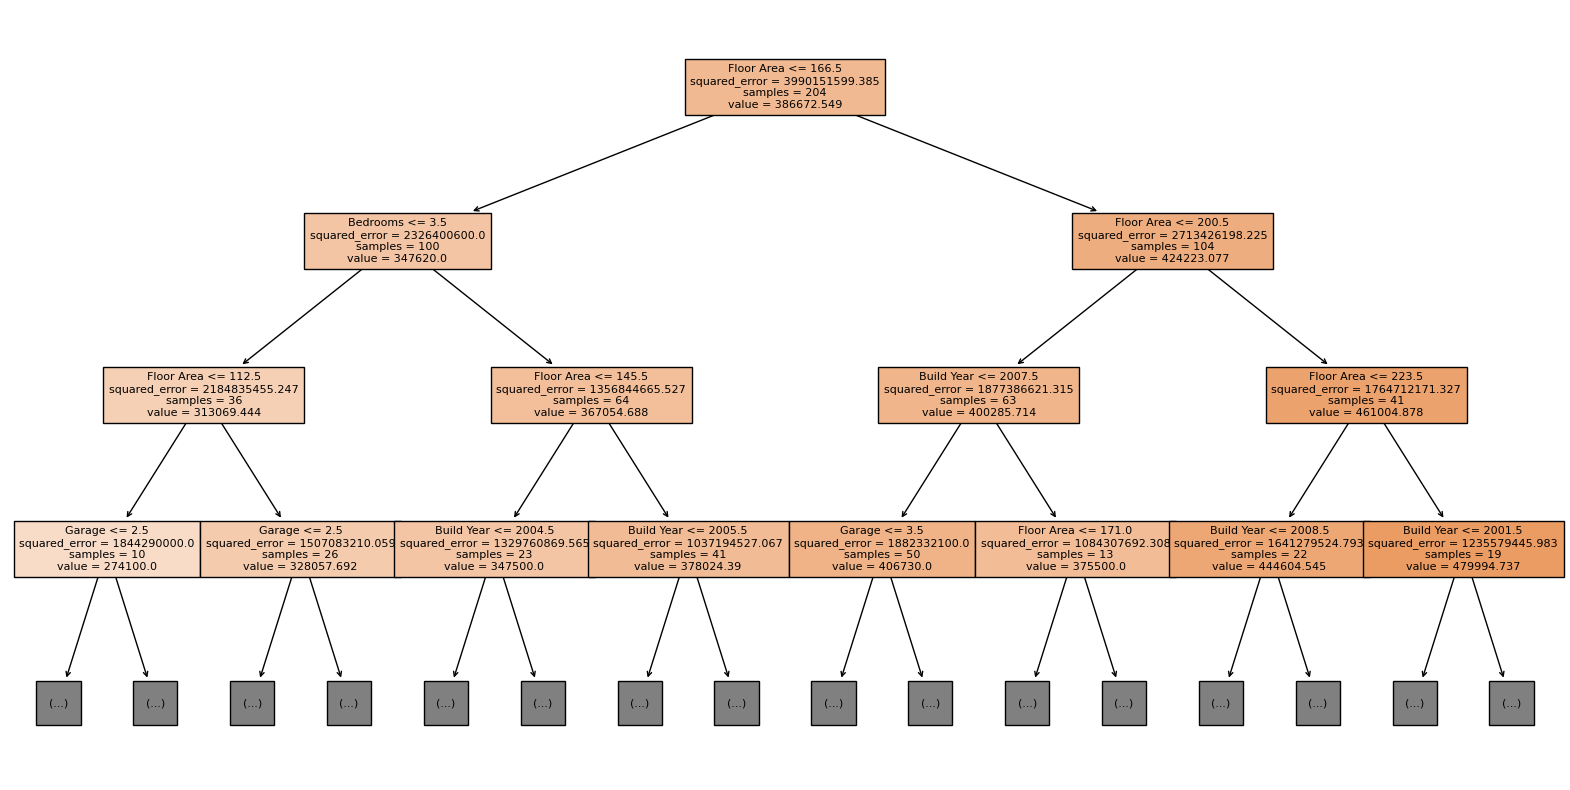

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model_lineal_no, max_depth=3, fontsize=8, feature_names=X.columns.tolist(), filled=True);

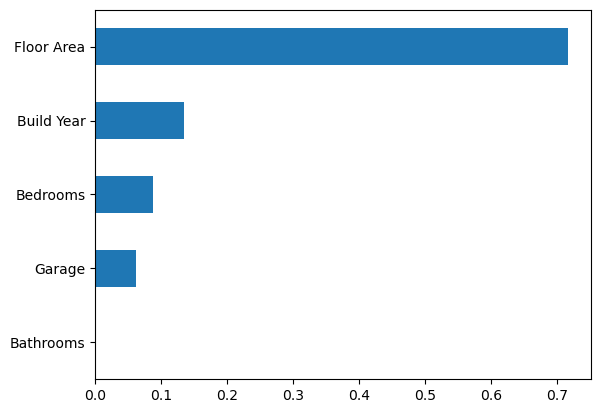

In [14]:
fi = model_lineal_no.feature_importances_
fn = model_lineal_no.feature_names_in_

pd.Series(fi, index=fn).sort_values(ascending=True).plot.barh();

## Summary

### Problem

| Non-linear models | Linear models |
| --- | --- |
| More complex | Less complex |
| More accurate (90%) | Less accurate (60%) |

### Solution

https://www.youtube.com/watch?v=ngOBhhINWb8

## SHAP to explain non-linear models

### Explainer

In [15]:
import shap
explainer = shap.TreeExplainer(model_lineal_no)

### SHAP values

In [16]:
df_pred['X'].style

,Bedrooms,Bathrooms,Garage,Build Year,Floor Area
0,3,2,2,2000,100
1,3,2,2,2000,200
2,3,2,2,2000,201
3,3,2,2,2000,202
4,3,2,2,2000,203
5,3,2,2,2000,204


In [17]:
shap_values = explainer.shap_values(df_pred['X'])
shap_values

array([[-41851.35832397,      0.        ,   5874.5258954 ,
         33230.74881995, -63926.46541099],
       [ -8764.9458556 ,      0.        ,  -1019.41590354,
         -7709.71701856,   3821.52975809],
       [ -8977.67072332,      0.        ,  -3904.58184871,
         -4509.68815853,  55719.39171095],
       [ -8977.67072332,      0.        ,  -3904.58184871,
         -4509.68815853,  55719.39171095],
       [ -8977.67072332,      0.        ,  -4002.46063659,
         -2845.74876459,  54153.33110489],
       [ -8977.67072332,      0.        ,  -4002.46063659,
         -2845.74876459,  54153.33110489]])

### Plots

#### Decision

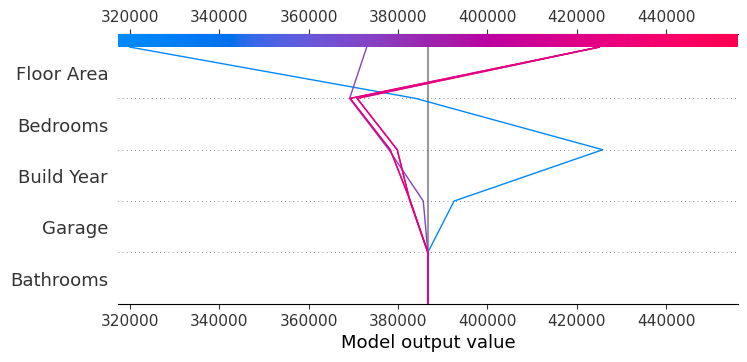

In [18]:
shap.decision_plot(explainer.expected_value, shap_values, df_pred['X'])

#### Force: Individual

In [19]:
shap.initjs()

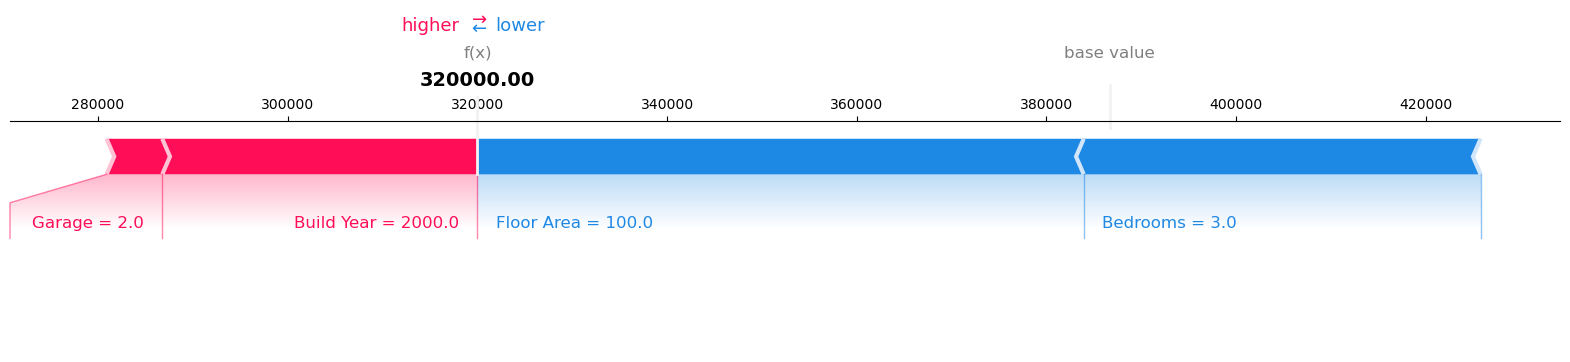

In [20]:
row = 0
shap.force_plot(explainer.expected_value, shap_values[row], df_pred['X'].iloc[row], matplotlib=True)

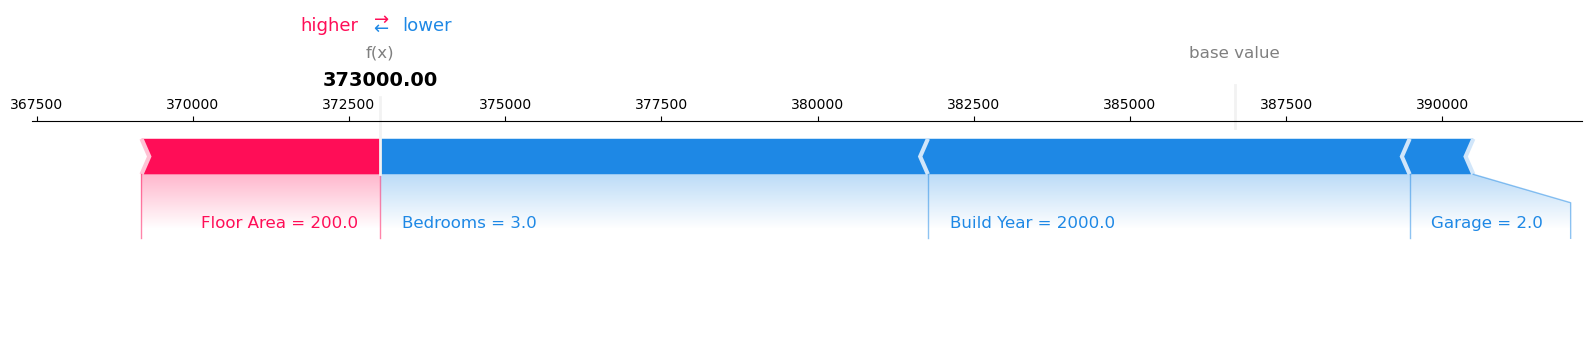

In [21]:
row = 1
shap.force_plot(explainer.expected_value, shap_values[row], df_pred['X'].iloc[row], matplotlib=True)

### Full data

In [22]:
shap_values = explainer.shap_values(X)
shap_values

array([[-24074.08117785,      0.        ,   4762.68579783,
        -17450.73934095, -79910.41429864],
       [  3650.09033235,      0.        ,    518.07503061,
         -3275.15462093,  82434.44023836],
       [  3645.37747582,      0.        ,   2454.48946148,
         28781.13251798,  23446.45152512],
       ...,
       [  4741.91960417,      0.        ,   -567.9506959 ,
         17800.21897745,  -2646.73690533],
       [  5028.54050872,      0.        ,  -1185.36331061,
         -4981.97502843, -35533.75118929],
       [  3645.37747582,      0.        ,   2929.95242444,
         18478.42087777,  29273.70020237]])

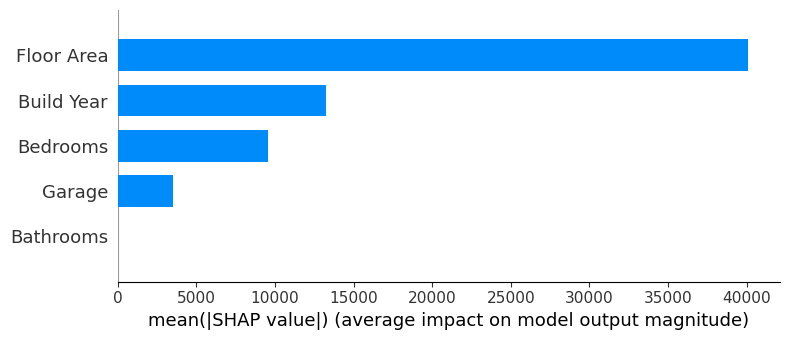

In [23]:
shap.summary_plot(shap_values, X, plot_type='bar')

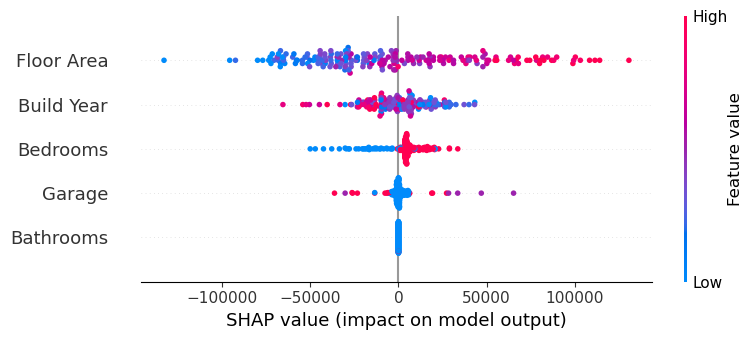

In [24]:
shap.summary_plot(shap_values, X)

In [25]:
shap.plots.force(explainer.expected_value, shap_values, X)

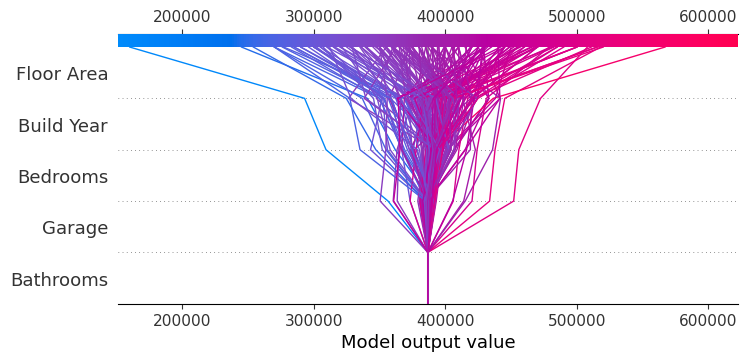

In [26]:
shap.decision_plot(explainer.expected_value, shap_values, X)

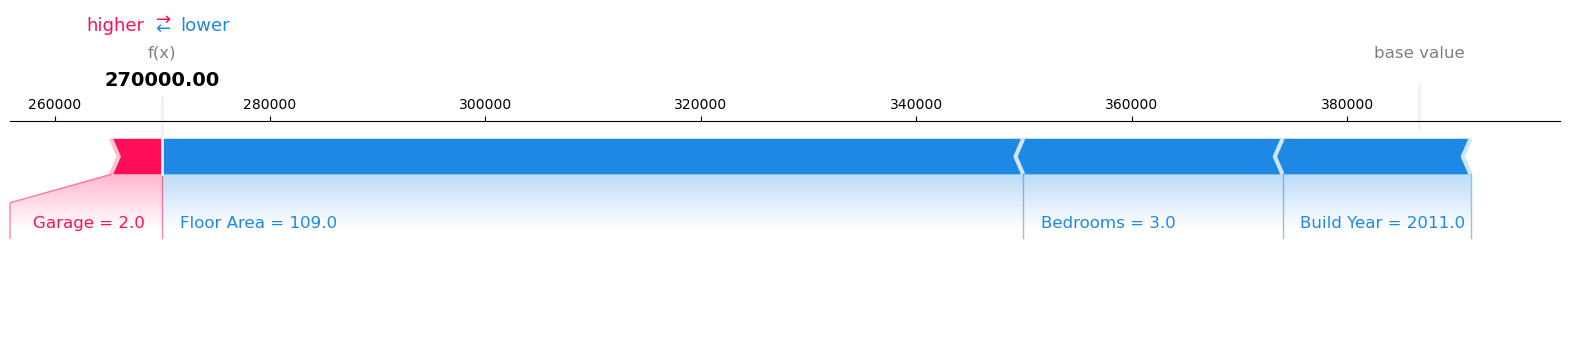

In [27]:
row = 0
shap.force_plot(explainer.expected_value, shap_values[row], X.iloc[row], matplotlib=True)

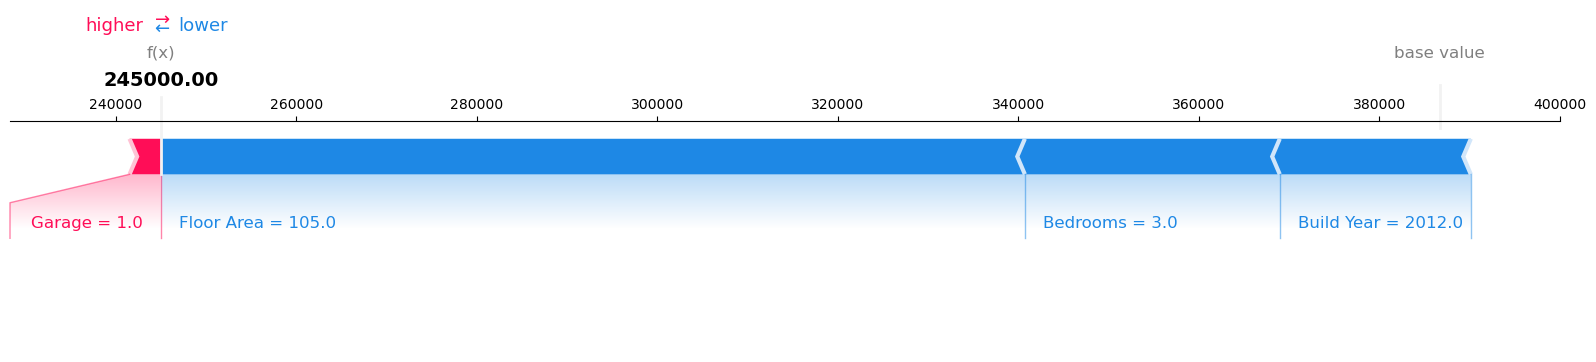

In [28]:
row = 4
shap.force_plot(explainer.expected_value, shap_values[row], X.iloc[row], matplotlib=True)

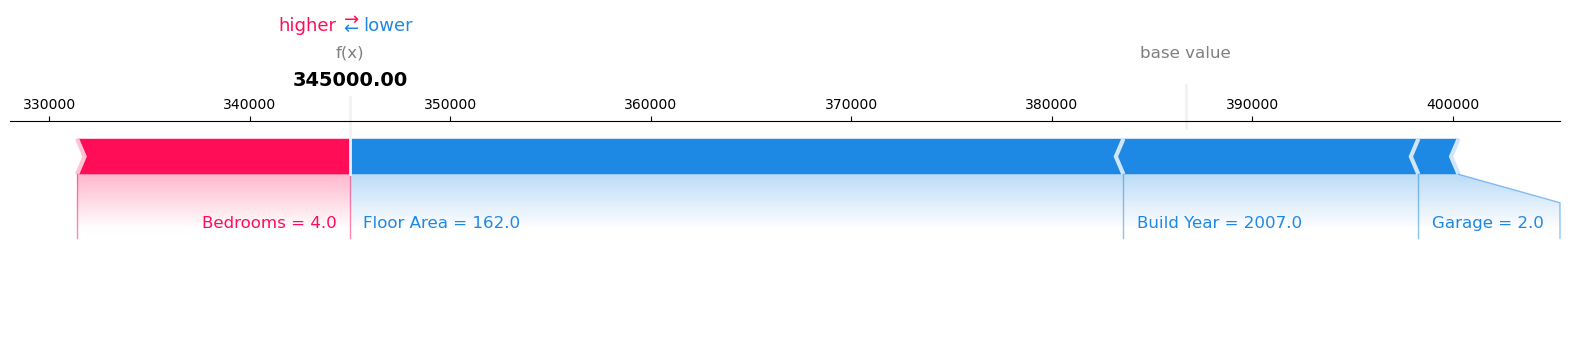

In [29]:
row = 14
shap.force_plot(explainer.expected_value, shap_values[row], X.iloc[row], matplotlib=True)

## References

### Shapley values from game theory

https://www.youtube.com/watch?v=w9O0fkfMkx0

### Permutation importance

- https://www.youtube.com/watch?v=-taOhqkiuIo
- https://www.kaggle.com/code/dansbecker/permutation-importance